In [36]:
import torch

#forward ; loss = (w*x-y)^2
def forward(x, y, w):
    # 其中 x,y 为输入数据，w为该函数所需要的参数
    y_predicted = w * x
    loss = (y_predicted - y)**2
    return loss


# 测试代码
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad=True)
forward(x, y, w)  # (2-1)²=1
x = torch.tensor(1.0,requires_grad=True)
y = torch.tensor(2.0,requires_grad=True)
# 将需要求取的 w 设置为可偏导
w = torch.tensor(1.0, requires_grad=True)
loss = forward(x, y, w)  # 计算损失
loss.backward()  # 反向传播，计算梯度
print("此时，loss 关于 w 的偏导为:", w.grad)
print("此时，loss 关于x的偏导为：",x.grad)
print("此时，loss 关于y的偏导为：",y.grad)
w.grad.zero_()  # 得到偏导后，清空梯度
x.grad.zero_()
y.grad.zero_()

此时，loss 关于 w 的偏导为: tensor(-2.)
此时，loss 关于x的偏导为： tensor(-2.)
此时，loss 关于y的偏导为： tensor(2.)


tensor(0.)

In [112]:
import numpy as np

# 所有点的预测值和实际值的距离的平方和，再取平均值（这种距离叫做欧氏距离）。
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()
#测试代码
y_pred = np.array([1,2])
y = np.array([1,1])
print('loss(y, y_pred)=',loss(y, y_pred))

#手动计算梯度
#返回dJ/dw
def gradient(x, y, w):
    return np.mean(2*w*x*x-2*x*y)
## 测试代码
x = np.array([1,2])
y = np.array([1,1])
print('gradient(x, y, 2)=',gradient(x, y, 2))

# 正向传播，计算预测值
def forward(x):
    return w * x
# 定义数据集合和 w 的初始化
X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)
w = 0.0
# 定义步长和迭代次数
learning_rate = 0.01
n_iters = 30

for epoch in range(n_iters):
    y_pred = forward(X)
    #计算损失
    l = loss(Y, y_pred)
    #计算梯度
    dw = gradient(X, Y, w)
    #更新权重 w
    w -= learning_rate * dw

    if epoch % 2 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
     
print(f'根据训练模型预测，当 x =5 时，y 的值为： {forward(5):.3f}')

loss(y, y_pred)= 0.5
gradient(x, y, 2)= 7.0
epoch 1: w = 0.300, loss = 30.00000000
epoch 3: w = 0.772, loss = 15.66018677
epoch 5: w = 1.113, loss = 8.17471600
epoch 7: w = 1.359, loss = 4.26725292
epoch 9: w = 1.537, loss = 2.22753215
epoch 11: w = 1.665, loss = 1.16278565
epoch 13: w = 1.758, loss = 0.60698175
epoch 15: w = 1.825, loss = 0.31684822
epoch 17: w = 1.874, loss = 0.16539653
epoch 19: w = 1.909, loss = 0.08633806
epoch 21: w = 1.934, loss = 0.04506905
epoch 23: w = 1.952, loss = 0.02352631
epoch 25: w = 1.966, loss = 0.01228092
epoch 27: w = 1.975, loss = 0.00641072
epoch 29: w = 1.982, loss = 0.00334642
根据训练模型预测，当 x =5 时，y 的值为： 9.924


In [113]:
#Torch计算梯度
import torch
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)
#初始化张量 w
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
# 定义步长和迭代次数
learning_rate = 0.01
n_iters = 30
for epoch in range(n_iters):
    y_pred = forward(X)
    l = loss(Y, y_pred)
    # 无需定义梯度求解的函数，直接求解梯度
    l.backward()
    # 利用梯度下降更新参数
    with torch.no_grad():
        # w.grad :返回 w 的梯度
        w.data -= learning_rate * w.grad
    
    # 清空梯度
    w.grad.zero_()

    if epoch % 2 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')
print(f'根据训练模型预测，当 x =5 时，y 的值为： {forward(5):.3f}')

epoch 1: w = 0.300, loss = 30.00000000
epoch 3: w = 0.772, loss = 15.66018772
epoch 5: w = 1.113, loss = 8.17471695
epoch 7: w = 1.359, loss = 4.26725292
epoch 9: w = 1.537, loss = 2.22753215
epoch 11: w = 1.665, loss = 1.16278565
epoch 13: w = 1.758, loss = 0.60698116
epoch 15: w = 1.825, loss = 0.31684780
epoch 17: w = 1.874, loss = 0.16539653
epoch 19: w = 1.909, loss = 0.08633806
epoch 21: w = 1.934, loss = 0.04506890
epoch 23: w = 1.952, loss = 0.02352631
epoch 25: w = 1.966, loss = 0.01228084
epoch 27: w = 1.975, loss = 0.00641066
epoch 29: w = 1.982, loss = 0.00334642
根据训练模型预测，当 x =5 时，y 的值为： 9.924


In [114]:
#Torch 定义的损失函数
import torch
import torch.nn as nn

# 初始化数据集
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)


def forward(x):
    # 正向传播函数
    return w * x

learning_rate = 0.01
n_iters = 30
# 测试代码
pre = forward(X)
print('pre=',pre)
for epoch in range(n_iters):
    loss = nn.MSELoss()
    l = loss(forward(X), Y)
    l.backward()
    # 利用梯度下降更新参数
    with torch.no_grad():
        # w.grad :返回 w 的梯度
        w.data -= learning_rate * w.grad
    
    # 清空梯度
    w.grad.zero_()

    if epoch % 2 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')
print(f'根据训练模型预测，当 x =5 时，y 的值为： {forward(5):.3f}')
# 这里使用均方差损失计算预测值和真实值之间的距离
#loss = nn.MSELoss()
# 测试此时的损失
#loss(forward(X), Y)

pre= tensor([0., 0., 0., 0.], grad_fn=<MulBackward0>)
epoch 1: w = 0.300, loss = 30.00000000
epoch 3: w = 0.772, loss = 15.66018772
epoch 5: w = 1.113, loss = 8.17471695
epoch 7: w = 1.359, loss = 4.26725292
epoch 9: w = 1.537, loss = 2.22753215
epoch 11: w = 1.665, loss = 1.16278565
epoch 13: w = 1.758, loss = 0.60698116
epoch 15: w = 1.825, loss = 0.31684780
epoch 17: w = 1.874, loss = 0.16539653
epoch 19: w = 1.909, loss = 0.08633806
epoch 21: w = 1.934, loss = 0.04506890
epoch 23: w = 1.952, loss = 0.02352631
epoch 25: w = 1.966, loss = 0.01228084
epoch 27: w = 1.975, loss = 0.00641066
epoch 29: w = 1.982, loss = 0.00334642
根据训练模型预测，当 x =5 时，y 的值为： 9.924


In [115]:
#Torch 定义损失和优化器
# 初始化数据集
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
learning_rate = 0.01
n_iters = 100
loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate)
# 模型的训练过程
for epoch in range(n_iters):
    y_predicted = forward(X)
    # 计算损失
    l = loss(Y, y_predicted)
    # 计算梯度
    l.backward()
    # 更新权重，即向梯度方向走一步，类似于w.data -= learning_rate * w.grad
    optimizer.step()
    # 清空梯度
    optimizer.zero_grad()

    if epoch % 10 == 0:
        print('epoch ', epoch+1, ': w = ', w, ' loss = ', l)


print(f'根据训练模型预测，当 x =5 时，y 的值为： {forward(5):.3f}')
del optimizer

epoch  1 : w =  tensor(0.3000, requires_grad=True)  loss =  tensor(30., grad_fn=<MseLossBackward>)
epoch  11 : w =  tensor(1.6653, requires_grad=True)  loss =  tensor(1.1628, grad_fn=<MseLossBackward>)
epoch  21 : w =  tensor(1.9341, requires_grad=True)  loss =  tensor(0.0451, grad_fn=<MseLossBackward>)
epoch  31 : w =  tensor(1.9870, requires_grad=True)  loss =  tensor(0.0017, grad_fn=<MseLossBackward>)
epoch  41 : w =  tensor(1.9974, requires_grad=True)  loss =  tensor(6.7705e-05, grad_fn=<MseLossBackward>)
epoch  51 : w =  tensor(1.9995, requires_grad=True)  loss =  tensor(2.6244e-06, grad_fn=<MseLossBackward>)
epoch  61 : w =  tensor(1.9999, requires_grad=True)  loss =  tensor(1.0176e-07, grad_fn=<MseLossBackward>)
epoch  71 : w =  tensor(2.0000, requires_grad=True)  loss =  tensor(3.9742e-09, grad_fn=<MseLossBackward>)
epoch  81 : w =  tensor(2.0000, requires_grad=True)  loss =  tensor(1.4670e-10, grad_fn=<MseLossBackward>)
epoch  91 : w =  tensor(2.0000, requires_grad=True)  loss

In [ ]:
'''
总结一下，我们可以将一个线性问题的求解分为下面三个步骤：

1. 定义模型（即正向传播函数）。
2. 定义损失和优化器。
3. 模型的训练（正向传播、反向传播、更新梯度、梯度下降、循环）。

可以看到其实模型训练的步骤是固定的:
1. 利用 nn.Linear 定义模型。
2. 利用 nn.MSELoss 定义损失。
3. 利用 torch.optim 定义优化器。
4. 利用梯度下降算法进行模型的训练。

并且模型的训练步骤也是固定的：
1. 利用 model(X) 进行正向传播。
2. 利用 loss(Y, y_predicted) 计算模型损失。
3. 利用 loss.backward() 计算模型梯度。
4. 利用 optimizer.step() 更新权重。
5. 利用 optimizer.zero_grad() 清空梯度。
6. 重复 1-5 的操作。
因此，使用 PyTorch 可以大大的简化我们的编程难度。我们只需要改变模型的形式、损失函数的形式、优化器的形式以及各个参数的值，
就能够训练出不同的模型，进而解决不同的深度学习问题了。
'''

In [116]:
# Torch一个完整的例子
#正向传播，计算预测值
def forward(x):
    return w * x

# 由于使用 PyTorch ，因此所有的变量都为张量
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)
X_test = torch.tensor([5], dtype=torch.float32)
print(X.shape, Y.shape)

# 1. 定义模型
n_samples, n_features = X.shape
# 这里输入和输出的维度相同
model = nn.Linear(n_features, n_features)
print('model = ', model)

# 2. 定义优化器和损失函数
learning_rate = 0.1
n_iters = 100

loss = nn.MSELoss()
# 在定义优化器时，直接利用 model.parameters() 表示模型中所有需要求的权重
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
print('optimizer = ', optimizer)

# 3. 模型的训练，固定的步骤：正向传播、计算损失、反向传播、更新权重、梯度清空
for epoch in range(n_iters):
    # 正向传播
    y_predicted = model(X)
    # 损失
    l = loss(Y, y_predicted)
    # 反向传播
    l.backward()
    # 更新权重
    optimizer.step()
    # 清空梯度
    optimizer.zero_grad()

    if epoch % 10 == 0:
        [w, b] = model.parameters()  # unpack parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l)

print(f'根据训练模型预测，当 x =5 时，y 的值为：', forward(X_test))

torch.Size([4, 1]) torch.Size([4, 1])
model =  Linear(in_features=1, out_features=1, bias=True)
optimizer =  SGD (
Parameter Group 0
    dampening: 0
    lr: 0.1
    momentum: 0
    nesterov: False
    weight_decay: 0
)
epoch  1 : w =  3.2500979900360107  loss =  tensor(25.8055, grad_fn=<MseLossBackward>)
epoch  11 : w =  2.1203315258026123  loss =  tensor(0.0239, grad_fn=<MseLossBackward>)
epoch  21 : w =  2.0741567611694336  loss =  tensor(0.0084, grad_fn=<MseLossBackward>)
epoch  31 : w =  2.054452657699585  loss =  tensor(0.0045, grad_fn=<MseLossBackward>)
epoch  41 : w =  2.040174722671509  loss =  tensor(0.0025, grad_fn=<MseLossBackward>)
epoch  51 : w =  2.02964448928833  loss =  tensor(0.0013, grad_fn=<MseLossBackward>)
epoch  61 : w =  2.02187442779541  loss =  tensor(0.0007, grad_fn=<MseLossBackward>)
epoch  71 : w =  2.0161406993865967  loss =  tensor(0.0004, grad_fn=<MseLossBackward>)
epoch  81 : w =  2.0119102001190186  loss =  tensor(0.0002, grad_fn=<MseLossBackward>)
epo

(100, 1) (100,)
100 1 1
model= Linear(in_features=1, out_features=1, bias=True)
optimizer =  SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)


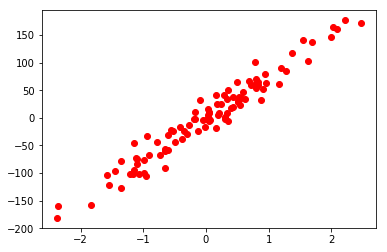

In [119]:
#实战 线性回归
import torch
import torch.nn as nn
#挑战
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

X_numpy, y_numpy = datasets.make_regression(
    n_samples=100, n_features=1, noise=20, random_state=4)
print(X_numpy.shape,y_numpy.shape)
plt.plot(X_numpy, y_numpy, 'ro')

# 编写代码处
X=torch.from_numpy(X_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))
y=y.view(y.shape[0],1)

# 测试代码
X.size(), y.size()
### 补充代码 ###
n_samples, n_features = X.shape
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 测试代码
print(n_samples,input_size,output_size)
print('model=',model)

loss = nn.MSELoss()
# 在定义优化器时，直接利用 model.parameters() 表示模型中所有需要求的权重
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
print('optimizer = ', optimizer)

epoch: 10, loss = 409.0306
epoch: 20, loss = 291.9953
epoch: 30, loss = 290.1886
epoch: 40, loss = 290.1602
epoch: 50, loss = 290.1597
epoch: 60, loss = 290.1598
epoch: 70, loss = 290.1597
epoch: 80, loss = 290.1597
epoch: 90, loss = 290.1598
epoch: 100, loss = 290.1597


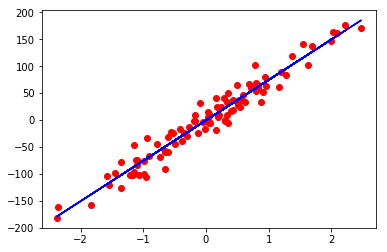

In [118]:
learning_rate = 0.01
n_iters = 100
for epoch in range(n_iters):
    # Forward pass and loss
    y_predicted = model(X)
    l = loss(y_predicted, y) 
    # Backward pass and update
    l.backward()
    optimizer.step()
    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {l.item():.4f}')



predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()